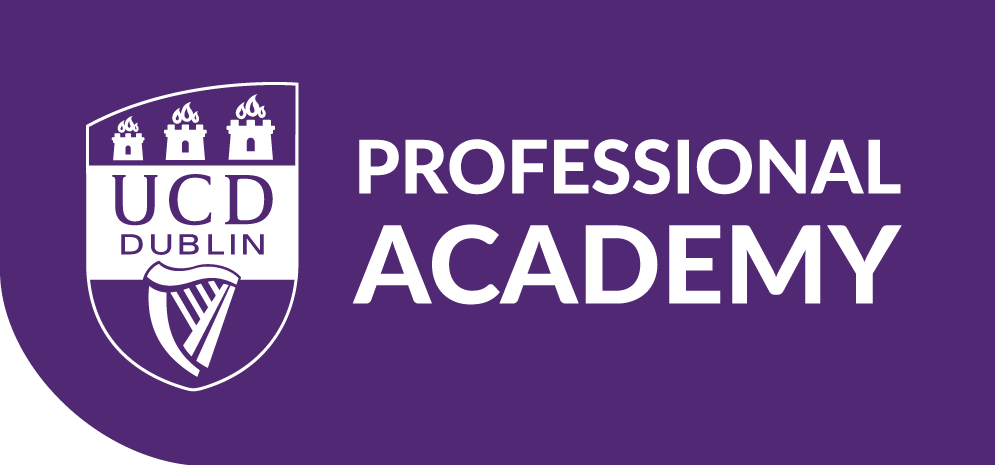
<h1 style="margin-top: -5px; margin-left: 40px; text-align: center; font-size: 3em;"><strong>Professional Certificate in Python Programming</strong></h1>

# Customer Relationship Management System

## Abstract:
This project presents the development of a Python-based Customer Relationship Management (CRM) system, inspired by over six years of hands-on experience working with leading CRM platforms. Leveraging this extensive expertise, I aim to create a simplified CRM solution that encapsulates fundamental CRM functionalities.
The CRM system's primary focus is on three core pillars: Customer Management, Product Cataloging, and Order Processing. These pillars represent the cornerstone of effective business operations, allowing organizations to nurture customer relationships, manage product portfolios, and streamline order fulfillment.

Key Features and Components:

Customer Management: The CRM system will enable businesses to maintain a centralized database of customer information. It will include features for storing contact details, adding and deleting customer profiles. A customer can be a Person or a Company. Customer tab on the application will display list of customers and buttons to add new customer and delete the selected customer.

Product Cataloging: A dedicated module for product management will enable businesses to organize their product inventory efficiently. User can add or remove products from the product catalouge. Products tab on the CRM application will list the products and has buttons to add new products and delete selected product from the list.

Order Processing: The CRM system streamlines the order processing experience with user-friendly functionalities. Users have the capability to choose both the customer and the desired products from a list within the GUI. Subsequently, they can initiate the creation of an order based on their selections. It also has buttons to list orders and delete selected orders from the list.

Although this CRM system encompasses a wide array of features and components, it's essential to recognize that, given our current time constraints, the initial implementation will prioritize customer, product, and order management. 



## Introduction:
Drawing upon my extensive experience of more than 6 years working with multiple CRM systems such as Salesforce, HubSpot, SugarCRM, and Monday.com, I seize this opportunity to embark on the creation of a simplified Customer Relationship Management (CRM) system using the power of Python.

Over the years, I have witnessed firsthand the transformative impact of CRM systems on businesses, revolutionizing how they manage customer interactions, track products, and streamline order processes. These systems have evolved to become indispensable tools, enabling organizations to foster meaningful relationships with their customers, optimize product offerings, and enhance operational efficiency.

With the knowledge gained from the python course and years of working within the CRM landscape, I endeavor to design and develop a Python-based CRM solution that encapsulates the essential elements of effective customer management, product cataloging and order processing.


## Implementation Process:


In [1]:
#Using sqlite3 to create a CRM database
#Using tkinter for GUI


import sqlite3
from tkinter import *
from tkinter import messagebox
from tkinter import ttk

#Classes for a Customer Relationship Management (CRM) system, 
#Customer is base class and includes attributes that are common to both company and person
#Person and Company classes inherit from Custmer class
#Product class holds attributes product name and price
#Order class contains attributes such as customer_id (to link the order to a customer) and product_ids (to specify which products are part of the order).


class Customer:
    customer_id = None
    def __init__(self, phone, email, address):
        self.phone= phone
        self.address= address
        self.email= email
    
class Person(Customer):
    def __init__(self, firstname, lastname, phone,email, address):
        super().__init__ (phone, email, address)
        self.firstname= firstname
        self.lastname = lastname
        
        
class Company(Customer):
    def __init__(self, name, phone,email,address, industry):
        super().__init__(phone, email, address)
        self.name= name
        self.industry= industry


class Product:
    product_id = None
    def __init__(self, name, price):
        self.name= name
        self.price= price

class Order:
    order_id = None
    status ="Draft"
    def __init__(self, customer_id, product_ids):
        self.customer_id = customer_id
        self.product_ids = product_ids

#CRMApp class holds functions and code to create the GUI, insert,list and delete logic for Customers, Products and Orders modules

class CRMApp:
    def __init__(self, root):
      
        self.root = root
        self.root.title("VCRM")
        self.root.geometry('1200x800')
        self.conn = sqlite3.connect('crm.db')
        self.create_tables()
        
        #Call only on the first run to add some sample data on the CRM system.
        self.insertsampledata()
        
        tabControl = ttk.Notebook(root)
        tab1 = ttk.Frame(tabControl)
        tab2 = ttk.Frame(tabControl)
        tab3 = ttk.Frame(tabControl)
        tab4 = ttk.Frame(tabControl)
        tabControl.add(tab1, text ='Customer')
        tabControl.add(tab2, text ='Products')
        tabControl.add(tab3, text ='Orders')
        tabControl.pack(expand = 1, fill ="both")
        
        #Customer tab
        custtree = ttk.Treeview(tab1, column=("Customer ID", "Customer Name","email", "Phone", "Address","Industry"), show='headings')
        custtree.column("#1", anchor=CENTER)
        custtree.heading("#1", text="Customer Id")
        custtree.column("#2", anchor=CENTER)
        custtree.heading("#2", text="Customer Name")
        custtree.column("#3", anchor=CENTER)
        custtree.heading("#3", text="Email")
        custtree.column("#4", anchor=CENTER)
        custtree.heading("#4", text="Phone")
        custtree.column("#5", anchor=CENTER)
        custtree.heading("#5", text="Address")
        custtree.column("#6", anchor=CENTER)
        custtree.heading("#6", text="Industry")
        custtree.pack()
        self.listcust(custtree)
        custtree.bind('<Button-1>', self.selectitem(custtree))
        listbtn = Button(tab1, text="List Customer", command=lambda: self.listcust(custtree)).pack()
        createbtn = Button(tab1, text="Add New Customer", command=lambda: self.create_customer()).pack()
        custdel = Button(tab1, text="Delete Selected Customer", command=lambda: self.delete_customer(custtree)).pack()
        
        #Products tab
        prodtree = ttk.Treeview(tab2, column=("ProductID", "Product Name","Price"), show='headings')
        prodtree.column("#1", anchor=CENTER)
        prodtree.heading("#1", text="ProductID")
        prodtree.column("#2", anchor=CENTER)
        prodtree.heading("#2", text="Product Name")
        prodtree.column("#3", anchor=CENTER)
        prodtree.heading("#3", text="Price")
        prodtree.pack()
        self.listprod(prodtree)
        self.prodstab(tab2,prodtree)
        
        #Orders tab
        ordtree = ttk.Treeview(tab3, column=("OrderID","Customer", "Products","TotalPrice"), show='headings')
        ordtree.column("#1", anchor=CENTER)
        ordtree.heading("#1", text="OrderID")
        ordtree.column("#2", anchor=CENTER)
        ordtree.heading("#2", text="Customer")
        ordtree.column("#3", anchor=CENTER)
        ordtree.heading("#3", text="Products")
        ordtree.column("#4", anchor=CENTER)
        ordtree.heading("#4", text="TotalPrice")
        ordtree.pack()
        self.Orderstab(tab3,ordtree)
        
    
    #Create table function
    def create_tables(self):
        c = self.conn.cursor()
        c.execute('''CREATE TABLE IF NOT EXISTS customers (customer_id INTEGER PRIMARY KEY,
            name TEXT,
            firstname TEXT,
            lastname TEXT,
            phone INTEGER,
            address TEXT,
            email TEXT,
            industry TEXT)''')

        c.execute('''CREATE TABLE IF NOT EXISTS products (product_id INTEGER PRIMARY KEY,
            name TEXT,
            price REAL)''')

        c.execute('''CREATE TABLE IF NOT EXISTS orders (order_id INTEGER PRIMARY KEY,
            customer_id INTEGER,
            FOREIGN KEY (customer_id) REFERENCES customers (customer_id))''')

        c.execute('''CREATE TABLE IF NOT EXISTS order_products (order_id INTEGER,
            product_id INTEGER,
            FOREIGN KEY (order_id) REFERENCES orders (order_id),
            FOREIGN KEY (product_id) REFERENCES products (product_id))''')
    
    def insertsampledata(self):
        c = self.conn.cursor()
        c.execute("delete from customers")
        c.execute("delete from products")
        c.execute("delete from Orders")
        c.execute("delete from Order_products")
        self.conn.commit()
        c.execute(''' INSERT INTO customers (firstname, lastname, phone,address,email)
                VALUES ("Vidya", "Prasad", 9282993007, "Dublin", "test@test.com")''')
        c.execute('''INSERT INTO customers ( name, phone,address,email, industry)
                VALUES ("Eason",7490897290 , "parnell street Dublin 1", "eason.test@test.com", "Retail")''')
        c.execute('''INSERT INTO customers ( name, phone,address,email, industry)
                VALUES ("Tesco",28239497290 , "Dundrum,Dublin 14", "Tesco.test@test.com", "Retail")''')
        c.execute('''INSERT INTO customers ( name, phone,address,email, industry)
                VALUES ("ArtandHobby",78469890290 , "Wicklow", "ArtandHobby.test@test.com", "Retail")''')
        c.execute('''INSERT INTO customers ( name, phone,address,email, industry)
                VALUES ("ProvidentCRM",78469890290 , "Dublin1", "pcrm.test@test.com", "IT")''')
        
        c.execute('''INSERT INTO products (product_id, name, price) VALUES (1, 'NoteBooks',3.0 )''')
        c.execute('''INSERT INTO products (product_id, name, price) VALUES (2, 'Pen',1.0 )''')
        c.execute('''INSERT INTO products (product_id, name, price) VALUES (3, 'Crayons',5.5 )''')
        c.execute('''INSERT INTO products (product_id, name, price) VALUES (4, 'Pencil',1.0 )''')
        c.execute('''INSERT INTO Orders (order_id, customer_id) VALUES (1, 1 )''')
        c.execute('''INSERT INTO Order_products (order_id, product_id) VALUES (1, 2 )''')
        c.execute('''INSERT INTO Order_products (order_id, product_id) VALUES (1, 4 )''')
        self.conn.commit()
    
#Customer functions
            
    def listcust(self,custtree):
        
        for item in custtree.get_children():
            custtree.delete(item)
        self.cur2=self.conn.cursor()
        self.cur2.execute(f'''select * from(SELECT customer_id, name  
        ,email,phone, address, industry FROM customers where name not null
        UNION ALL
        SELECT customer_id, firstname || ' ' || lastname  AS name
        ,email,phone, address, industry FROM customers where name is null ) Order by customer_id''')
        rows = self.cur2.fetchall()    
        for row in rows:
            print(row) 
            custtree.insert("", END, values=row)            
    
    def delete_customer(self,custtree):
        self.cur2=self.conn.cursor()
        for i in custtree.selection():
            print("deleting customer ",custtree.item(i)["values"][1])
            custid=custtree.item(i)["values"][0]
            self.cur2.execute(f''' delete from customers where customer_id ={custid}''')
            custtree.delete(i)
        self.conn.commit()
      
    def create_customer(self):
        create_cust = Tk()
        create_cust.title("Add new Customer")
        create_cust.geometry('530x400')
        options = ['','Company', 'Person']
        clicked = StringVar(create_cust)
        clicked.set(options[0])
        select_lbl = Label(create_cust, text="Please select the type of Customer")
        select_lbl.pack()
        drop = OptionMenu(create_cust , clicked , *options)
        drop.pack()
        c_btn = Button(create_cust, text="Create",command=lambda: [c_btn.pack_forget(), drop.config(state="disabled"), self.check_type(create_cust,clicked)] )
        c_btn.pack()
     
        
    def check_type(self,create_cust,clicked):
            if clicked.get() == 'Company':
                create_cust_lbl = Label(create_cust, text="Please enter below details")
                create_cust_lbl.pack()
                custname_label = Label(create_cust, text="Name")
                custname_label.pack()
                custname_entry= Entry(create_cust, width= 40)
                custname_entry.focus_set()
                custname_entry.pack()
                custphone_label = Label(create_cust, text="Phone")
                custphone_label.pack()
                custphone_entry= Entry(create_cust, width= 40)
                custphone_entry.focus_set()
                custphone_entry.pack()
                custemail_label = Label(create_cust, text="Email")
                custemail_label.pack()
                custemail_entry= Entry(create_cust, width= 40)
                custemail_entry.focus_set()
                custemail_entry.pack()
                custAddr_label = Label(create_cust, text="Address")
                custAddr_label.pack()
                custAddr_entry= Entry(create_cust, width= 40)
                custAddr_entry.focus_set()
                custAddr_entry.pack()
                custind_label = Label(create_cust, text="Industry")
                custind_label.pack()
                custind_entry= Entry(create_cust, width= 40)
                custind_entry.focus_set()
                custind_entry.pack()
                cust_done_btn = Button(create_cust, text="Done", command=lambda: [cust_done_btn.pack_forget(),self.assign_type(create_cust=create_cust,Custtype=clicked.get(),name=custname_entry.get(),phone=custphone_entry.get(),email=custemail_entry.get(),address=custAddr_entry.get(),industry=custind_entry.get())])
                cust_done_btn.pack()           
            elif clicked.get() == 'Person':
                create_cust_lbl = Label(create_cust, text="Please enter below details")
                create_cust_lbl.pack()
                custfname_label = Label(create_cust, text="Firstname")
                custfname_label.pack()
                custfname_entry= Entry(create_cust, width= 40)
                custfname_entry.focus_set()
                custfname_entry.pack()
                custlname_label = Label(create_cust, text="Lastname")
                custlname_label.pack()
                custlname_entry= Entry(create_cust, width= 40)
                custlname_entry.focus_set()
                custlname_entry.pack()
                custphone_label = Label(create_cust, text="Phone")
                custphone_label.pack()
                custphone_entry= Entry(create_cust, width= 40)
                custphone_entry.focus_set()
                custphone_entry.pack()
                custemail_label = Label(create_cust, text="Email")
                custemail_label.pack()
                custemail_entry= Entry(create_cust, width= 40)
                custemail_entry.focus_set()
                custemail_entry.pack()
                custAddr_label = Label(create_cust, text="Address")
                custAddr_label.pack()
                custAddr_entry= Entry(create_cust, width= 40)
                custAddr_entry.focus_set()
                custAddr_entry.pack()
                prdone_btn = Button(create_cust, text="Done", command=lambda: [prdone_btn.pack_forget(),self.assign_type(create_cust=create_cust,Custtype=clicked.get(),firstname=custfname_entry.get(),lastname=custlname_entry.get(),phone=custphone_entry.get(),email=custemail_entry.get(),address=custAddr_entry.get())] )
                prdone_btn.pack()            
            else:
                print("no customer created")
                create_cust.destroy() 

    def assign_type(self,create_cust,Custtype, phone,address,email,industry="",name="",firstname="", lastname=""):
        try:
            phone_check=int(phone)    
            if Custtype == 'Company':
                newcust= Company(name=name,phone=phone,email=email,address=address,industry=industry)
                self.insert_Cust(newcust,create_cust)

            elif Custtype == 'Person':
                newcust= Person(firstname=firstname, lastname=lastname, phone=phone,address=address,email=email)
                self.insert_Cust(newcust,create_cust)
        except ValueError:
            print("Please enter a valid phone number")
            Err_label = Label(create_cust, text="Please enter a valid phone number")
            Err_label.pack()
            tryagain_button = Button(create_cust, text="Try again", command=lambda: [create_cust.destroy(),self.create_customer()] )      
            tryagain_button.pack()
            close_btn = Button(create_cust, text="Close window", command=lambda: [self.close_window(create_cust)])
            close_btn.pack()

        else :
                print("no customer created")
                custAddr_label = Label(create_cust, text="no customer created")
                custAddr_label.pack()
                

    def insert_Cust(self, customer,create_cust):
        c = self.conn.cursor()
        if isinstance(customer, Person):
            c.execute(''' INSERT INTO customers (firstname, lastname, phone,address,email)
                VALUES (?, ?, ?, ?, ?)
                ''', ( customer.firstname, customer.lastname, customer.phone, customer.address, customer.email))
        elif isinstance(customer, Company):
            c.execute('''INSERT INTO customers ( name, phone,address,email, industry)
                VALUES (?, ?, ?, ?, ?)
                ''', (customer.name, customer.phone, customer.address, customer.email, customer.industry))
        self.conn.commit()
        Succ_label = Label(create_cust, text="customer created")
        Succ_label.pack()
        print("customer created")
        comp_btn = Button(create_cust, text="Close window", command=lambda: [self.close_window(create_cust)])
        comp_btn.pack()
     
 #Common functions

    def close_window(self,win):
            win.destroy()
        
        
    def selectitem(self,event):
        #print("selected item")
         pass

 #Product functions
    def prodstab(self,tab2,prodtree):
        
        prodtree.bind('<Button-1>', self.selectitem(prodtree))
        listbtn = Button(tab2, text="List Product", command=lambda: self.listprod(prodtree)).pack()
        createbtn = Button(tab2, text="Add Product", command=lambda: self.create_product()).pack()
        proddel = Button(tab2, text="Delete Selected Products", command=lambda: self.delete_product(prodtree)).pack()
        
    def listprod(self,prodtree):
        for item in prodtree.get_children():
            prodtree.delete(item)
        self.cur2=self.conn.cursor()
        self.cur2.execute(f'''SELECT product_id, name, price FROM products''')
        pros = self.cur2.fetchall()    
        for pro in pros:
            print(pro) 
            prodtree.insert("", END, values=pro)
    
    def create_product(self):
        
        createprod = Tk()
        createprod.title("Add new Customer")
        createprod.geometry('530x400')
        select_lbl = Label(createprod, text="Please enter the details")
        select_lbl.pack()
        prodname_label = Label(createprod, text="Name")
        prodname_label.pack()
        prodname_entry= Entry(createprod, width= 40)
        prodname_entry.focus_set()
        prodname_entry.pack()
        prodprice_label = Label(createprod, text="Price")
        prodprice_label.pack()
        prodprice_entry= Entry(createprod, width= 40)
        prodprice_entry.focus_set()
        prodprice_entry.pack()
        proddone_btn = Button(createprod, text="Done", command=lambda: [proddone_btn.pack_forget(),self.insert_product(createprod,prodname_entry.get(),prodprice_entry.get())] )
        proddone_btn.pack() 
        
    def insert_product(self, createprod,prodname,price):
        try:
            __price= float(price)
            prod=Product(prodname,__price)
            c = self.conn.cursor()
            c.execute('''
            INSERT INTO products ( name, price)
            VALUES ( ?, ?)
            ''', (prod.name, prod.price))
            self.conn.commit()
            success_label = Label(createprod, text=f"{prod.name} added to the product catalogue")
            success_label.pack()
            close_btn = Button(createprod, text="Close window", command=lambda: [self.close_window(createprod)])
            close_btn.pack()

        except ValueError:
            print("Please enter a valid price")
            Err_label = Label(createprod, text="Please enter a valid price")
            Err_label.pack()
            tryagain_button = Button(createprod, text="Try again", command=lambda: [createprod.destroy(),self.create_product()] )      
            tryagain_button.pack()
            close_btn = Button(createprod, text="Close window", command=lambda: [self.close_window(createprod)])
            close_btn.pack()

    def delete_product(self,prodtree):
        self.cur2=self.conn.cursor()
        for i in prodtree.selection():
            print("deleting Product ",prodtree.item(i)["values"][1])
            prodid=prodtree.item(i)["values"][0]
            self.cur2.execute(f''' delete from products where product_id ={prodid}''')
            prodtree.delete(i)
        self.conn.commit()
    


    #Orders functions      
    def Orderstab(self,tab3,ordtree):
        

        def listord():
            for item in ordtree.get_children():
                ordtree.delete(item)
            self.cur2=self.conn.cursor()
            orders = self.cur2.execute('''SELECT orders.order_id, CASE WHEN customers.name IS NULL THEN customers.firstname || ' ' || customers.lastname ELSE customers.name END
                                       , GROUP_CONCAT(products.name, ', ') as prod,SUM(products.price) as total \
                            FROM orders \
                            JOIN customers ON orders.customer_id=customers.customer_id \
                            JOIN order_products ON orders.order_id=order_products.order_id \
                            JOIN products ON order_products.product_id=products.product_id \
                            GROUP BY orders.order_id''').fetchall()
       
            for order in orders:
                print(order) 
                ordtree.insert("", END, values=order)

        # Function to delete selected order  
        def delete_order():
            self.cur2=self.conn.cursor()
            for i in ordtree.selection():
                print("deleting order ",ordtree.item(i)["values"][1])
                ordid=ordtree.item(i)["values"][0]
                self.cur2.execute(f''' delete from orders where order_id ={ordid}''')
                ordtree.delete(i)
            self.conn.commit()
       
        
        
        
        #create order function that creates a new window to read orders information from the user. 
        #This function encapsulates sub functions required for reading data from users and inserting the orders into the database
        def create_order():
            
            def fillcustentrybox(e):
                Cust_entry.delete(0,END)
                Cust_entry.insert(END,customer_listbox.get(ACTIVE))
            def update_listbox(cdata):
                customer_listbox.delete(0,END)
                for item in cdata:
                    customer_listbox.insert(END,item)
            def checkcustentry(e):
                custtyped=Cust_entry.get()  
                if custtyped=='':
                    custdata=customer_list
                else:
                    custdata=[]
                    for item in customer_list:
                        if custtyped.lower() in item.lower():
                            custdata.append(item)
                update_listbox(custdata)         
            
            # Function to insert into orders,order_products table based on selected customer and products
            def insert_order():
                self.cur=self.conn.cursor()
                selected_customer = customer_listbox.get(ACTIVE)
                selected_products = product_listbox.curselection()
                if not selected_customer or not selected_products:
                    return
                for i in customer_listwithid:
                    if selected_customer.lower() in i[1].lower():
                        customer_id=i[0]
                        max_order_id=self.cur.execute("select max(order_id) from orders").fetchone()[0]
                        order_id= int(max_order_id or 0)+1
                        self.cur.execute("INSERT INTO orders (order_id,customer_id) VALUES (?,?)", (order_id,customer_id))
                        for p in selected_products:
                            product_name = product_listbox.get(p)
                            for prod in product_listwithid:
                                if product_name.lower() in prod[1].lower():
                                    product_id = prod[0]
                                    self.cur.execute("INSERT INTO order_products (order_id,product_id) VALUES (?,?)", (order_id,product_id))
                                    print("Order created")
                
                self.conn.commit()
                listord()
                add_order.destroy()
            

            add_order= Tk()
            add_order.title("Add new Order")
            add_order.geometry('800x800')
            Cust_sel_label= Label(add_order, text="CUSTOMER")
            Cust_sel_label.grid(row=1,column=0)
            Cust_type_label= Label(add_order, text="Start typing...")
            Cust_type_label.grid(row=0,column=1)
            Cust_entry=Entry(add_order)
            Cust_entry.grid(row=1,column=1)
            customer_listbox = Listbox(add_order)
            customer_listbox.grid(row=2,column=1)
            customer_listbox.bind("<<ListboxSelect>>",fillcustentrybox)
            Cust_entry.bind("<KeyRelease>",checkcustentry)
            Prod_sel_label= Label(add_order, text="Product")
            Prod_sel_label.grid(row=3,column=0)
            product_listbox = Listbox(add_order, selectmode=MULTIPLE)
            product_listbox.grid(row=4,column=1)
            order_button = Button(add_order, text="Create Order", command=insert_order)
            order_button.grid(row=8,column=1)
            self.cur3=self.conn.cursor()
            customer_listwithid = self.cur3.execute('''
                        SELECT customer_id, name FROM customers where name not null
                        UNION ALL 
                        SELECT customer_id,firstname || ' ' || lastname  AS name FROM customers where name is null''').fetchall()
            customer_list=[item[1] for item in customer_listwithid]
            print(customer_list)
            product_listwithid= self.cur3.execute("SELECT product_id, name FROM products").fetchall()
            product_list= [item[1] for item in product_listwithid]
            for cust in customer_list:
                customer_listbox.insert(END, cust)
            for prod in product_list:
                product_listbox.insert(END, prod)
        
        
        listord()
        ordtree.bind('<Button-1>', self.selectitem(ordtree))
        listbtn = Button(tab3, text="List Orders", command=lambda: listord()).pack()
        createbtn = Button(tab3, text="Add Order", command=create_order).pack()
        proddel = Button(tab3, text="Delete Selected Order", command=lambda: delete_order()).pack() 
        
        
def main():
    root = Tk()
    app = CRMApp(root)
    root.mainloop()
    

if __name__ == "__main__":
    main()



(1, 'Vidya Prasad', 'test@test.com', 9282993007, 'Dublin', None)
(2, 'Eason', 'eason.test@test.com', 7490897290, 'parnell street Dublin 1', 'Retail')
(3, 'Tesco', 'Tesco.test@test.com', 28239497290, 'Dundrum,Dublin 14', 'Retail')
(4, 'ArtandHobby', 'ArtandHobby.test@test.com', 78469890290, 'Wicklow', 'Retail')
(5, 'ProvidentCRM', 'pcrm.test@test.com', 78469890290, 'Dublin1', 'IT')
(1, 'NoteBooks', 3.0)
(2, 'Pen', 1.0)
(3, 'Crayons', 5.5)
(4, 'Pencil', 1.0)
(1, 'Vidya Prasad', 'Pen, Pencil', 2.0)


## References:
